# How Healthy is Fast-Food?
### <span style="color:#83898b">*Understanding the Nutritional Valuies of Fast-Food Chains*</span>
#### ***Aakash Harendran***

The rise of fast food has significantly transformed the way we eat in times bringing convenience and simplicity. Prominent brands such as McDonalds and Subway have seamlessly integrated into our routines with their menus efficient production methods and effective customer service models. However, the widespread availability of food raises concerns about its impact on public health. As fast food becomes a part of people's lives questions arise regarding its value. To go further into these issues we can turn to the Fast Food Nutrition dataset sourced from Kaggle. This dataset provides an opportunity to examine the profiles of various fast-food items offered by well-known restaurant chains. The dataset looks through restaurants, their best-selling item and its nutritional facts. In this assignment, I wanted to explore the aspects of the nutritional value of the items that fast food chains offer and compare them with each chain to see which is the healthiest overall. I also wanted to explore each of the fast food chain's overall servings and intake of calories, cholesterol, sugar, etc... and see the relationships between them.

![Image of Fast Food Service](https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/Fast_Food_Service_Cashiers.jpg/800px-Fast_Food_Service_Cashiers.jpg?20201115022552)

<p style="font-size: small">Danny Choo, Public domain, via <a href="https://commons.wikimedia.org/wiki/File:Fast_Food_Service_Cashiers.jpg">[Wikimedia Commons]</p>


## Data Collection

The data set was taken from **[Kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition/)**, a free online resource for datasets.

In [784]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [785]:
fastfood = pd.read_csv('fastfood.csv')

## Data Cleaning

The dataset had some columns which were irrelevant to the assignment and had a lot of missing cells, which I removed. The dataset was then further modified to output precise numerical floating points and sorted alphabetically.

In [786]:
pd.set_option('display.precision', 2)
df = pd.DataFrame(fastfood)
df = df.drop({'cal_fat', 'salad'}, axis=1)
df = df.dropna(axis=0)
df = df.sort_values(by="restaurant")
display(df)

,restaurant,item,calories,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
188,Arbys,Crispy Chicken Farmhouse Salad,430,24,8.0,0.0,65,1000,26,4.0,4,28.0,60.0,20.0,25.0
177,Arbys,Turkey Gyro,470,20,3.5,0.0,45,1520,48,3.0,5,25.0,10.0,15.0,10.0
173,Arbys,Super Roast Beef,430,17,5.0,1.0,45,1060,45,3.0,11,23.0,10.0,10.0,8.0
172,Arbys,Smokehouse Brisket,600,35,12.0,1.0,110,1240,42,2.0,7,33.0,4.0,8.0,20.0
169,Arbys,"Roast Turkey, Ranch & Bacon Wrap",620,34,11.0,0.5,85,2130,39,4.0,6,37.0,20.0,10.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Taco Bell,Beef Crunchy Cheesy Core Burrito,630,26,10.0,0.5,45,1530,76,7.0,5,22.0,15.0,4.0,35.0
415,Taco Bell,Chicken Crunchy Cheesy Core Burrito,610,24,9.0,0.0,55,1510,74,5.0,5,25.0,10.0,4.0,35.0
509,Taco Bell,Original Triple Double Crunchwrap,700,30,9.0,0.5,45,1550,85,9.0,7,23.0,15.0,6.0,25.0
457,Taco Bell,Double Chalupa,600,35,8.0,0.5,50,1010,50,6.0,5,21.0,15.0,4.0,15.0


## Analyses
I will explore the relationship between each restaurant and its nutritional values with exploratory analyses, which consist of statistical summaries through tables and charts to help visualize.

### General Analyses

I will begin by looking into the number of items offered by each restaurant. The figure suggests that Subway offers the most while Chick-fil-A offers the least.

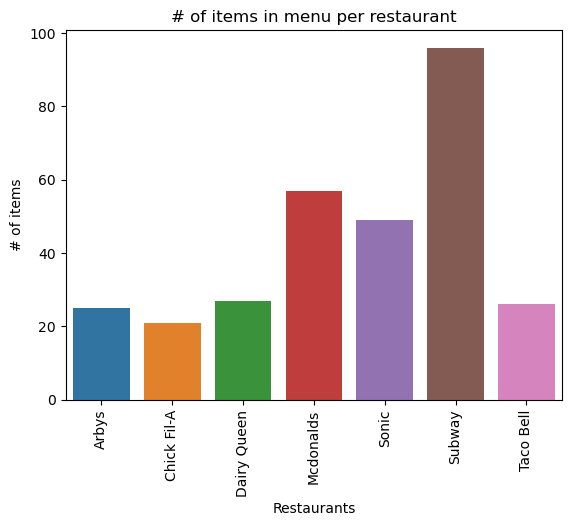

In [787]:
r = sns.countplot(x = 'restaurant', data = df)
r = r.set(title="# of items in menu per restaurant", xlabel='Restaurants', ylabel='# of items')
plt.xticks(rotation=90)
plt.show()

To find the relationship between each restaurant and their nutritional values, I must find the ***average*** of each nutritional value within each restaurant to give us a more concise table for easier comparisons.  

In [788]:

a_nu = df.groupby('restaurant').mean()
display(a_nu)


,calories,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
restaurant,,,,,,,,,,,,,
Arbys,486.00,22.56,6.56,0.42,61.40,1410.40,43.36,2.84,7.24,28.00,12.56,8.40,17.36
Chick Fil-A,318.10,13.14,3.07,0.00,67.86,953.33,22.95,2.10,3.48,27.76,12.62,12.24,10.52
Dairy Queen,519.26,28.89,10.22,0.81,72.78,1114.26,38.89,2.33,6.59,23.70,14.00,4.37,16.41
Mcdonalds,640.35,31.81,8.29,0.46,109.74,1437.89,48.79,3.23,11.07,40.30,33.72,18.30,20.60
Sonic,620.00,36.65,11.61,1.00,87.65,1280.61,47.37,2.69,6.61,29.43,6.94,5.76,17.24
Subway,503.02,18.48,6.20,0.22,61.30,1272.97,54.72,6.56,10.09,30.31,22.39,41.97,39.12
Taco Bell,523.85,26.50,8.52,0.31,49.42,1198.85,51.42,5.35,4.04,19.77,11.85,4.54,24.81


### Calories
An examination of the average amount of ***calories*** found in each restaurants.

The table below shows the average calories of items per restaurants.

In [789]:
cal_columns = ['calories']
cal_data = a_nu[cal_columns]
display(cal_data)

,calories
restaurant,
Arbys,486.00
Chick Fil-A,318.10
Dairy Queen,519.26
Mcdonalds,640.35
Sonic,620.00
Subway,503.02
Taco Bell,523.85


A descriptive analysis of calories shows the Maximum, Average, and Minimum calories through each restaurant.

In [790]:
cal = cal_data.calories.describe()
print(f"Calories\n")
print(f"Max: {round(cal['max'],2)}")
print(f"Average: {round(cal['mean'],2)}")
print(f"Min: {round(cal['min'],2)}")

Calories

Max: 640.35
Average: 515.8
Min: 318.1


The figure below shows a fairly even distribution of calories throughout each restaurants.

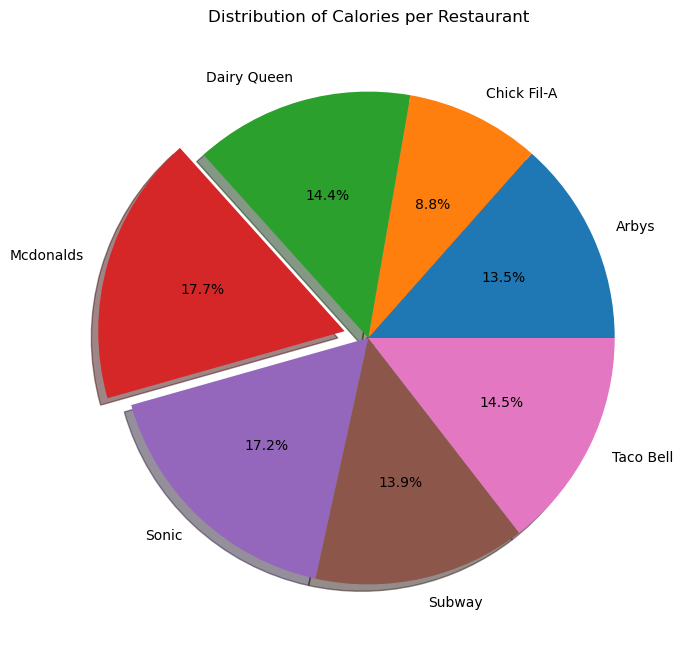

In [791]:
cal_pie = a_nu['calories']
explode = (0, 0, 0, 0.1, 0, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(cal_pie, explode=explode, labels=cal_pie.index, autopct='%1.1f%%', shadow = True, startangle=0)
plt.title('Distribution of Calories per Restaurant')
plt.show()

This suggests that calories are fairly even throughout each restaurant, with **McDonald's** having the highest caloric meals.

### Fats
An examination of the average amount of ***saturated fats***, ***trans fats***, and ***total fats*** found in each restaurants.


The table below shows the average amount of each fats from items per restaurants.

In [792]:
fat_columns = ['total_fat', 'sat_fat', 'trans_fat']
fat_data = a_nu[fat_columns]
display(fat_data)

,total_fat,sat_fat,trans_fat
restaurant,,,
Arbys,22.56,6.56,0.42
Chick Fil-A,13.14,3.07,0.00
Dairy Queen,28.89,10.22,0.81
Mcdonalds,31.81,8.29,0.46
Sonic,36.65,11.61,1.00
Subway,18.48,6.20,0.22
Taco Bell,26.50,8.52,0.31


A descriptive analysis of each fats shows the Maximum, Average, and Minimum fats through each restaurant.

In [793]:
t_fat = fat_data.total_fat.describe()
print(f"Total Fat\n")
print(f"Max: {round(t_fat['max'],2)}")
print(f"Average: {round(t_fat['mean'],2)}")
print(f"Min: {round(t_fat['min'],2)}")

Total Fat

Max: 36.65
Average: 25.43
Min: 13.14


In [794]:
sat_fat = fat_data.sat_fat.describe()
print(f"Saturated Fat\n")
print(f"Max: {round(sat_fat['max'],2)}")
print(f"Average: {round(sat_fat['mean'],2)}")
print(f"Min: {round(sat_fat['min'],2)}")

Saturated Fat

Max: 11.61
Average: 7.78
Min: 3.07


In [795]:
tr_fat = fat_data.trans_fat.describe()
print(f"Trans Fat\n")
print(f"Max: {round(tr_fat['max'],2)}")
print(f"Average: {round(tr_fat['mean'],2)}")
print(f"Min: {round(tr_fat['min'],2)}")

Trans Fat

Max: 1.0
Average: 0.46
Min: 0.0


The heatmap below gives a visual of all the fats from each restaurant. **Sonic** has the most fats while **Chick-FIl-A** has the least.

Text(0.5, 1.0, 'Fat Content per Restaurant')

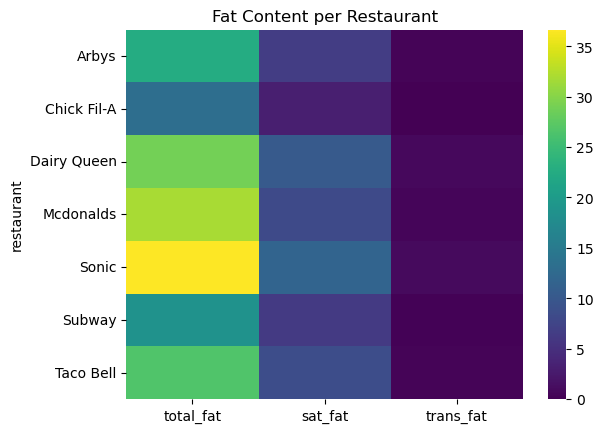

In [796]:
fat_heatmap = sns.heatmap(fat_data, cmap="viridis", fmt='g')
fat_heatmap.set_title('Fat Content per Restaurant')

A boxplot goes further into each of the restaurants distribution of total fats.

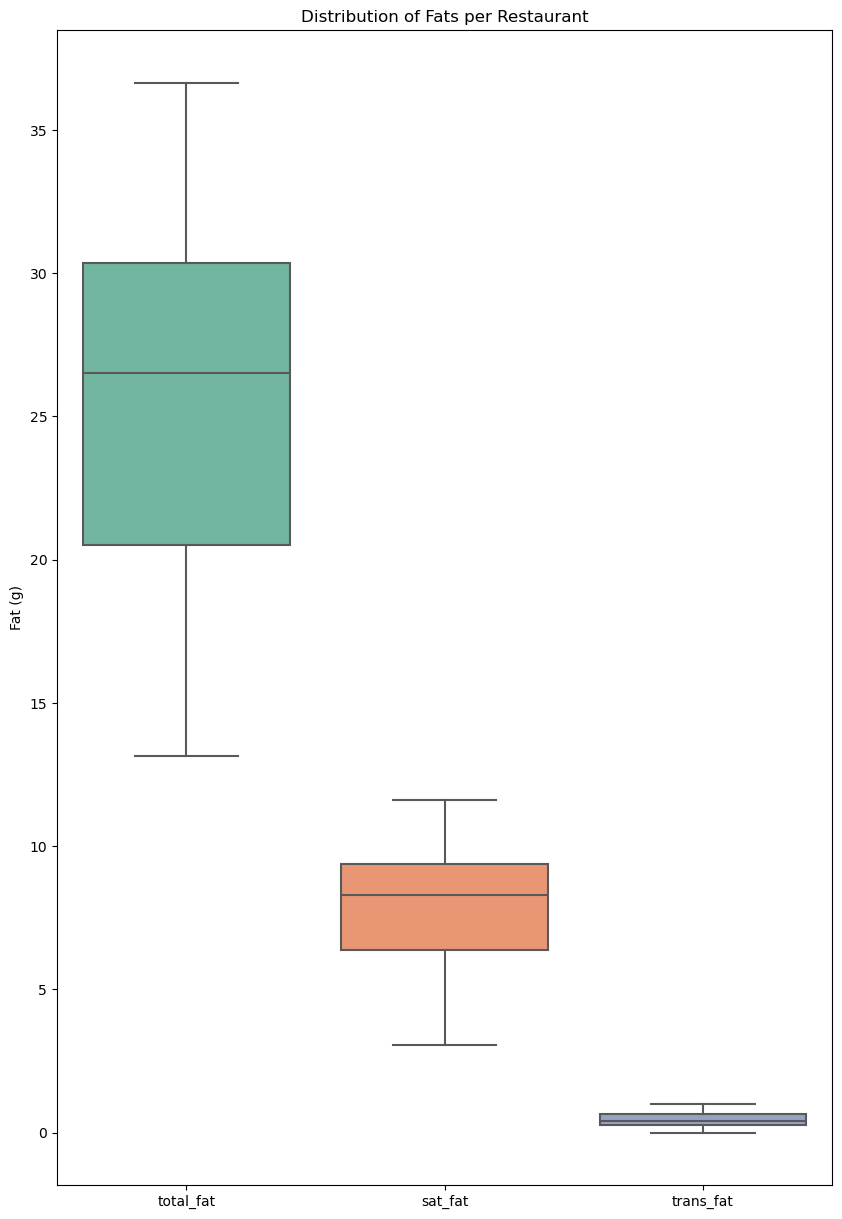

In [797]:
plt.figure(figsize=(10, 15))
sns.boxplot(data=fat_data, palette="Set2")
plt.title('Distribution of Fats per Restaurant')
plt.ylabel("Fat (g)")
plt.show()

This suggests that the amount of fats found in each items per restaurant is ***not*** fairly distributed amongst each restaurant, with **Sonic** having the highest overall and **Chick-Fil-A** having the least.

### Cholesterol
An examination of the average amount of ***cholesterol*** found in each restaurants.


The table below shows the average amount of cholesterol in each items per restaurants.

In [798]:
Cho_columns = ['cholesterol']
Cho_data = a_nu[Cho_columns]
display(Cho_data)

,cholesterol
restaurant,
Arbys,61.40
Chick Fil-A,67.86
Dairy Queen,72.78
Mcdonalds,109.74
Sonic,87.65
Subway,61.30
Taco Bell,49.42


A descriptive analysis of cholesterol shows the Maximum, Average, and Minimum through each restaurant.

In [799]:
cho = Cho_data.cholesterol.describe()
print(f"Cholesterol\n")
print(f"Max cholesterol: {round(cho['max'],2)}")
print(f"Average cholesterol: {round(cho['mean'],2)}")
print(f"Min cholesterol: {round(cho['min'],2)}")

Cholesterol

Max cholesterol: 109.74
Average cholesterol: 72.88
Min cholesterol: 49.42


The scatterplot below gives a visual of the data.

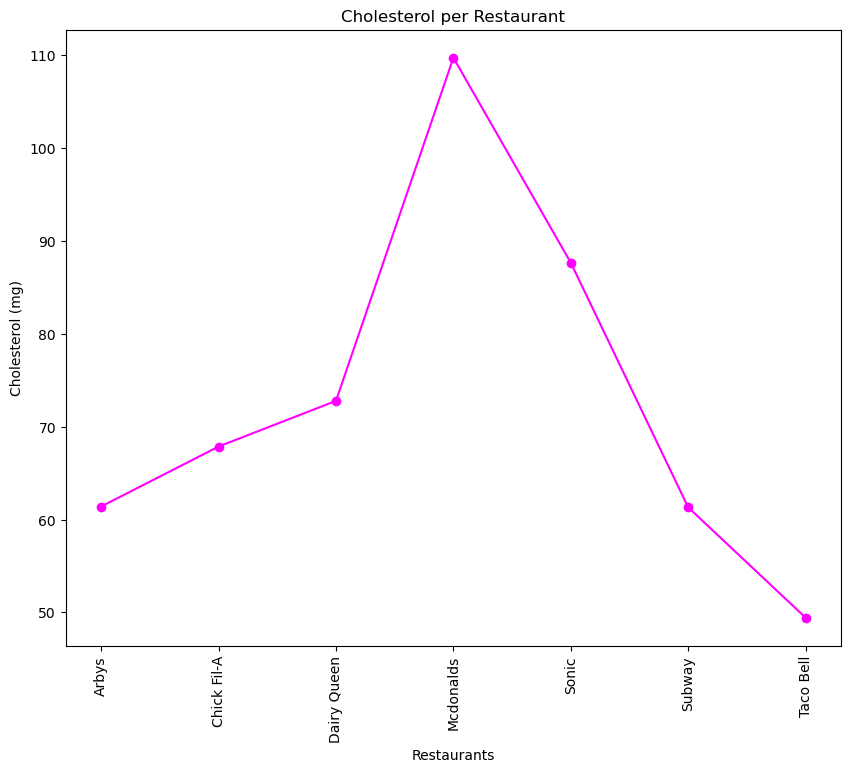

In [800]:
plt.figure(figsize=(10, 8))
plt.scatter(Cho_data.index, Cho_data.cholesterol, color = "magenta")
plt.plot(Cho_data.index, Cho_data.cholesterol, color = "magenta")
plt.title('Cholesterol per Restaurant')
plt.ylabel("Cholesterol (mg)")
plt.xlabel('Restaurants')
plt.xticks(rotation=90)  
plt.show()

This suggests that the cholesterol found is different with each restaurant, showing that **McDonald's** has the highest cholesterol while **Taco Bell** has the lowest cholesterol.

### Sodium
An examination of the average amount of ***sodium*** found in each restaurants.

The table below shows the average sodium of items per restaurants.

In [801]:
Sodiun_columns = ['sodium']
Sodiun_data = a_nu[Sodiun_columns]
display(Sodiun_data)

,sodium
restaurant,
Arbys,1410.40
Chick Fil-A,953.33
Dairy Queen,1114.26
Mcdonalds,1437.89
Sonic,1280.61
Subway,1272.97
Taco Bell,1198.85


A descriptive analysis of sodium shows the Maximum, Average, and Minimum through each restaurant.

In [802]:
S = Sodiun_data.sodium.describe()
print(f"Sodium\n")
print(f"Max: {round(S['max'],2)}")
print(f"Average: {round(S['mean'],2)}")
print(f"Min: {round(S['min'],2)}")

Sodium

Max: 1437.89
Average: 1238.33
Min: 953.33


The bar graph below gives a visual of the data.

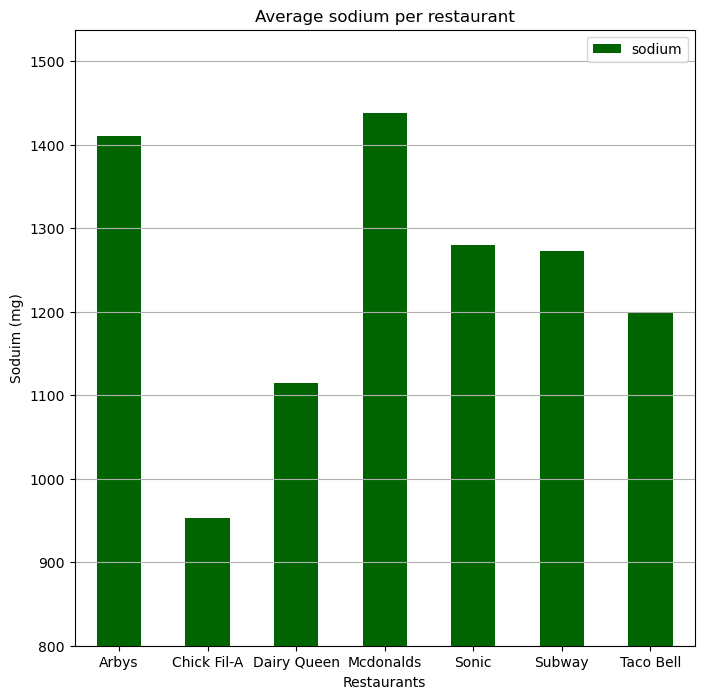

In [803]:
Sodium_barplot = Sodiun_data.plot.bar(stacked=False, color = ["darkgreen"], figsize=(8,8), title="Average sodium per restaurant")
Sodium_barplot.grid(axis='y')
plt.ylabel("Soduim (mg)")
plt.xlabel('Restaurants')
plt.xticks(rotation=0)
plt.ylim(800,max(Sodiun_data.sodium)+100)
plt.show(Sodium_barplot)

This suggests that the sodium found in each restaurant is **NOT** even with **McDonald's** having the highest while **Chick-Fil-A** having the lowest.

### Carbohydrates 
An examination of the average amount of ***carbohydrates*** found in each restaurants.

In [804]:
carb_columns = ['total_carb']
carb_data = a_nu[carb_columns]
display(carb_data)

,total_carb
restaurant,
Arbys,43.36
Chick Fil-A,22.95
Dairy Queen,38.89
Mcdonalds,48.79
Sonic,47.37
Subway,54.72
Taco Bell,51.42


A descriptive analysis of carbohydrates shows the Maximum, Average, and Minimum through each restaurant.

In [805]:
carb = carb_data.total_carb.describe()
print(f"Total Carbohydrates\n")
print(f"Max: {round(carb['max'],2)}")
print(f"Average: {round(carb['mean'],2)}")
print(f"Min: {round(carb['min'],2)}")

Total Carbohydrates

Max: 54.72
Average: 43.93
Min: 22.95


The scatter plot below gives us a visual of the data.

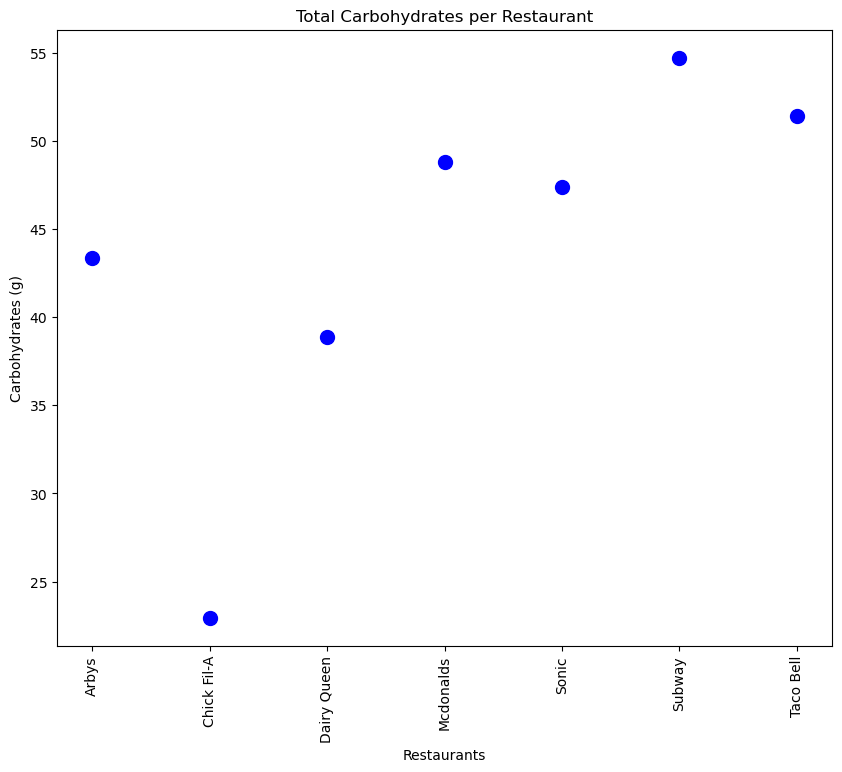

In [806]:
plt.figure(figsize=(10, 8))
plt.scatter(carb_data.index, carb_data.total_carb, color = "blue", s=100)
plt.title('Total Carbohydrates per Restaurant')
plt.ylabel("Carbohydrates (g)")
plt.xlabel('Restaurants')
plt.xticks(rotation=90)  
plt.show()

This suggests that within the distribution, **Subway** has the most carbohydrates while **Chick-Fil-A** has the least.

### Fiber
An examination of the average amount of ***fiber*** found in each restaurants.

The table below shows the average fiber of items per restaurants.

In [807]:
fib_colusmns = ['fiber']
fib_data = a_nu[fib_colusmns]
display(fib_data)

,fiber
restaurant,
Arbys,2.84
Chick Fil-A,2.10
Dairy Queen,2.33
Mcdonalds,3.23
Sonic,2.69
Subway,6.56
Taco Bell,5.35


A descriptive analysis of fiber shows the Maximum, Average, and Minimum through each restaurant.

In [808]:
fib = fib_data.fiber.describe()
print(f"Fiber\n")
print(f"Max: {round(fib['max'],2)}")
print(f"Average: {round(fib['mean'],2)}")
print(f"Min: {round(fib['min'],2)}")

Fiber

Max: 6.56
Average: 3.59
Min: 2.1


The stackplot below shows the amount of fiber found per restaurant.

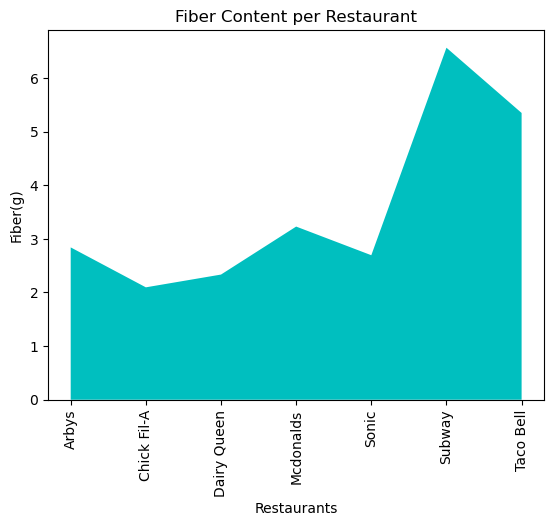

In [809]:
plt.stackplot(fib_data.index, fib_data.fiber, colors='c')
plt.xlabel('Restaurants')
plt.xticks(rotation=90)
plt.ylabel('Fiber(g)')
plt.title('Fiber Content per Restaurant')
plt.show()

This suggests that **Subway** has the most amount of fiber while **Chick-Fil-A** has the least.

### Sugar
An examination of the average amount of ***sugar*** found in each restaurant.

The table below shows the average sugar of items per restaurants.

In [810]:
suger_columns = ['sugar']
suger_data = a_nu[suger_columns]
display(suger_data)

,sugar
restaurant,
Arbys,7.24
Chick Fil-A,3.48
Dairy Queen,6.59
Mcdonalds,11.07
Sonic,6.61
Subway,10.09
Taco Bell,4.04


A descriptive analysis of sugar shows the Maximum, Average, and Minimum through each restaurant.

In [811]:
sugar = suger_data.sugar.describe()
print(f"Sugar\n")
print(f"Max: {round(sugar['max'],2)}")
print(f"Average: {round(sugar['mean'],2)}")
print(f"Min: {round(sugar['min'],2)}")

Sugar

Max: 11.07
Average: 7.02
Min: 3.48


The graph below gives us a visual of the data.

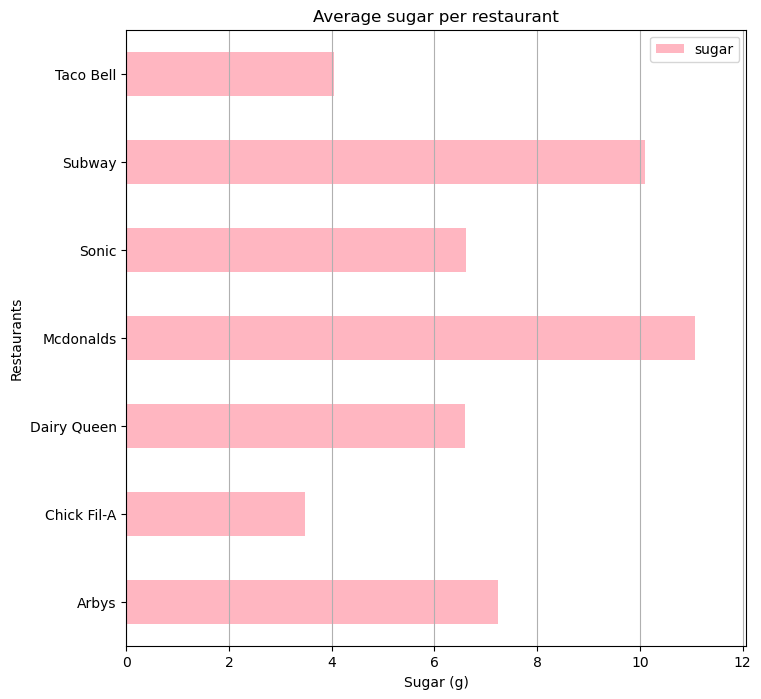

In [812]:
suger_barplot = suger_data.plot.barh(stacked=False, color = ["lightpink"], figsize=(8,8), title="Average sugar per restaurant")
suger_barplot.grid(axis='x')
plt.xlabel("Sugar (g)")
plt.ylabel('Restaurants')
plt.xticks(rotation=0)  
plt.xlim(0,max(suger_data.sugar)+1)
plt.show()

This suggests that the amount of sugar found in **Mcdonald's** is the highest overall while **Chick-Fil-A** being the least.

### Protein
An examination of the average amount of ***protein*** found in each restaurant.

The table below shows the average protein of items per restaurants.

In [813]:
protein_columns = ['protein']
protein_data = a_nu[protein_columns]
display(protein_data)

,protein
restaurant,
Arbys,28.00
Chick Fil-A,27.76
Dairy Queen,23.70
Mcdonalds,40.30
Sonic,29.43
Subway,30.31
Taco Bell,19.77


A descriptive analysis of protein shows the Maximum, Average, and Minimum through each restaurant.

In [814]:
protein = protein_data.protein.describe()
print(f"Protein\n")
print(f"Max: {round(protein['max'],2)}")
print(f"Average: {round(protein['mean'],2)}")
print(f"Min: {round(protein['min'],2)}")

Protein

Max: 40.3
Average: 28.47
Min: 19.77


The pie chart below shows the distribution of the amount of protein found per restaurant.

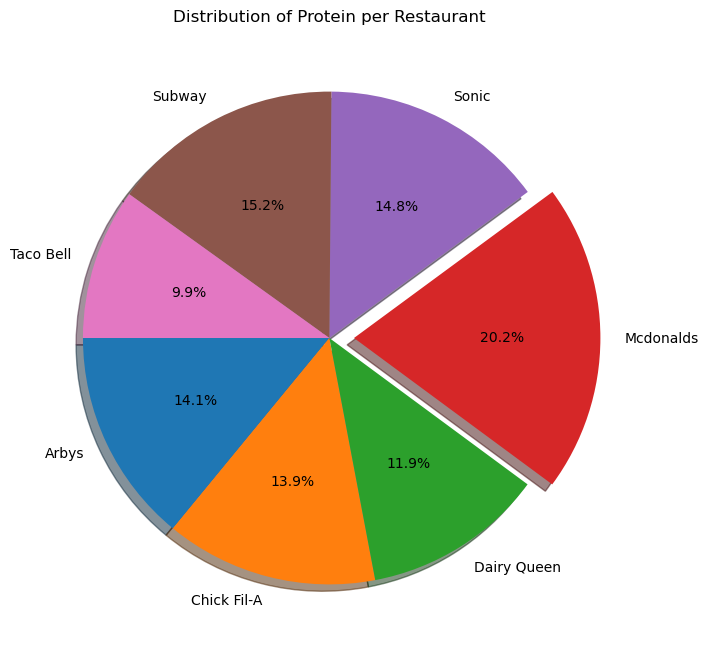

In [815]:
protein_pie = a_nu['protein']
explode = (0, 0, 0, 0.1, 0, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(protein_pie, explode=explode, labels=protein_pie.index, autopct='%1.1f%%', shadow = True, startangle=180)
plt.title('Distribution of Protein per Restaurant')
plt.show()

This suggests that the amount of protein found in **McDonald's** is the highest while **Taco Bell** is the lowest

### Vitamins/Minerals
An examination of the average amount of ***vitamins/minerals*** found in each restaurant.

The table below shows the average amount of vitamins/minerals in each items per restaurants.

In [816]:
vit_columns = ['vit_a', 'vit_c', 'calcium']
vit_data = a_nu[vit_columns]
display(vit_data)

,vit_a,vit_c,calcium
restaurant,,,
Arbys,12.56,8.40,17.36
Chick Fil-A,12.62,12.24,10.52
Dairy Queen,14.00,4.37,16.41
Mcdonalds,33.72,18.30,20.60
Sonic,6.94,5.76,17.24
Subway,22.39,41.97,39.12
Taco Bell,11.85,4.54,24.81


A descriptive analysis of vitamins/minerals shows the Maximum, Average, and Minimum through all the restaurant.

In [817]:
vit_a = vit_data.vit_a.describe()
print(f"Vitamin A\n")
print(f"Max: {round(vit_a['max'],2)}")
print(f"Average: {round(vit_a['mean'],2)}")
print(f"Min: {round(vit_a['min'],2)}")

Vitamin A

Max: 33.72
Average: 16.3
Min: 6.94


In [818]:
vit_c = vit_data.vit_c.describe()
print(f"Vitamin C\n")
print(f"Max: {round(vit_c['max'],2)}")
print(f"Average: {round(vit_c['mean'],2)}")
print(f"Min: {round(vit_c['min'],2)}")

Vitamin C

Max: 41.97
Average: 13.65
Min: 4.37


In [819]:
calcium = vit_data.calcium.describe()
print(f"Calcium\n")
print(f"Max: {round(calcium['max'],2)}")
print(f"Average: {round(calcium['mean'],2)}")
print(f"Min: {round(calcium['min'],2)}")

Calcium

Max: 39.12
Average: 20.87
Min: 10.52


The heatmap below gives us a visual of the data

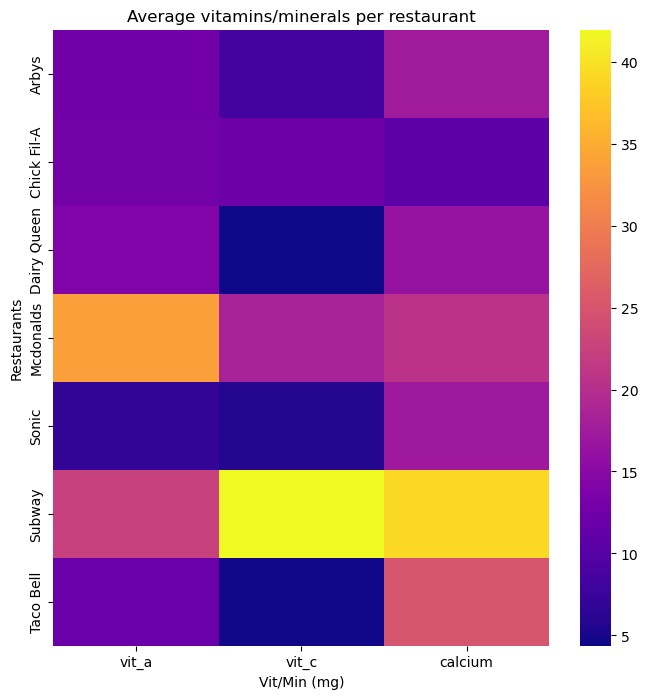

In [820]:
plt.figure(figsize=(8, 8))
sns.heatmap(vit_data, cmap="plasma", annot=False, fmt=".2f")
plt.title("Average vitamins/minerals per restaurant")
plt.ylabel("Restaurants")
plt.xlabel("Vit/Min (mg)")
plt.show()

This suggests that the amount of vitamins/minerals in each restaurant drastically varies. With **McDonald's** having the most for ***Vitamin A***, and **Subway** having the most for ***Vitamin C*** and ***Calcium***. The graph also suggests that **Sonic** has the least amount of ***Vitamin A***, **Dairy Queen** having the least for ***Vitamin C***, and **Chick-Fil-A** having the least for ***Calcium***.

## Discussion

In this assignment, I explored data relating to the nutritional value of each restaurant's best-selling item. The data was used to directly compare each nutritional asset found in each restaurant's items and compare it with its competitors. An exploratory analysis suggests that food from these restaurants is high in calories, fats, cholesterol, sodium, and sugar while being sufficiently low in fiber, carbohydrates, and protein. When compared to each of their competitors, the data suggests that only their calories throughout their meals are similar while everything else drastically differs. Further exploratory analysis suggests that **McDonald's is the most unhealthiest fast food chain** due to the restaurant serving high caloric meals which has the highest amount of cholesterol, sodium, and sugar. The analysis also suggests that **Chick-fil-A is the healthiest fast food chain** due to the restaurant serving low caloric and low carb meals that also have low fat, low sodium, and low sugar. These outcomes imply that we should be more cautious when eating from fast food chains and always do our research before purchasing meals.

## References
1. Source data - https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition/
2. Futher manipulation of pie charts - https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
3. Further manipulation of heatmap = https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
4. Further manipulations of boxplots - https://matplotlib.org/stable/plot_types/stats/boxplot_plot.html#sphx-glr-plot-types-stats-boxplot-plot-py
5. Further manipulation of stackplots - https://matplotlib.org/stable/plot_types/basic/stackplot.html#sphx-glr-plot-types-basic-stackplot-py
6. Pandas for data manipulation
7. Matplotlib for data viz 
8. Seaborn for data viz